In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

from collections import defaultdict

In [4]:
patterns = pd.read_csv("../Trapeze_Data/Patterns.csv")
performed_work = pd.read_csv("../Trapeze_Data/PerformedWork.csv")

In [3]:
# Find only the rows where the same stop code comes up twice in a sequence
groups = patterns.groupby(['id', 'stopCode']).filter(lambda x: len(x) > 1) 

previous_id = ''
previous_stop_code = ''
previous_sequence = 0
previous_timing_point = 0
total = 0

stops_dict = defaultdict(list)

# Go through all the matches
for row in groups.iterrows():
    
    # If we are looking at the second of the pair (I've previously checked that the most matches is two)
    if(row[1]['id'] == previous_id and row[1]['stopCode'] == previous_stop_code):
        
        # Count the number of pairs
        total += 1
        
        stops_dict[previous_stop_code].append(previous_id)
        
        # If they aren't directly one after the other shout about it
        if(row[1]['sequence'] != previous_sequence + 1):
            print(f"Pattern: {previous_id} with stop_code: {previous_stop_code} is not sequential!!!")
            print(f"{previous_sequence} and {row[1]['sequence']}")
            print("-------------")
        else:
            # If they are directly one after the other then see if either of them are a timing point
            if(previous_timing_point is True):
                if(row[1]['timingPoint']):
                    print("B", end="") # Both
                else:
                    print("F") # First
            else:
                if(row[1]['timingPoint']):
                    print("S", end="") #Second
                else:
                    print("0") # Neither
            
    previous_id = row[1]['id']
    previous_stop_code = row[1]['stopCode']
    previous_sequence = row[1]['sequence']
    previous_timing_point = row[1]['timingPoint']


print(f"\n\tTotal number of pairs is: {total}")
print(f"All stop codes that are duplicated are:{stops_dict}")

SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
	Total number of pairs is: 138
All stop codes that are duplicated are:defaultdict(<class 'list'>, {'1290BOB20387': ['167_16', '167_125', '167_18', '167_128', '167_21', '167_14', '167_127', '167_116', '167_2', '167_3', '167_115', '167_6', '167_117', '167_118', '167_1', '167_17', '167_15', '167_126', '167_124', '168_1', '168_2', '168_116', '168_3', '168_118', '168_6', '168_117', '168_115', '168_17', '168_126', '168_18', '168_15', '168_16', '168_125', '168_128', '168_21', '168_124', '168_127', '168_14'], '1290BOB20403': ['167_38', '167_44', '167_42', '167_135', '167_137', '167_40', '167_133', '167_134', '167_46', '167_37', '167_51', '167_36', '167_48', '167_23', '167_22', '167_26', '167_130', '167_24', '167_25', '167_28', '167_129', '167_33', '167_132', '167_31', '167_35', '167_32', '167_34', '167_131', '167_45', '167_136', '167_43', '167_41', '167_39'

In [9]:
# Now to translate each pattern to a route number/name

stops_routes = defaultdict(set)

for key, values in stops_dict.items():
    
    for pattern in values:

        for work in performed_work.loc[performed_work.patternId == pattern].iterrows():
            stops_routes[key].add(work[1]['publicName'])

print(stops_routes)

defaultdict(<class 'set'>, {'1290BOB20387': {'1', '1c'}, '1290BOB20403': {'1', '1c'}, '1280BOB20047': {'6'}, '1290BOB20402': {'7'}})


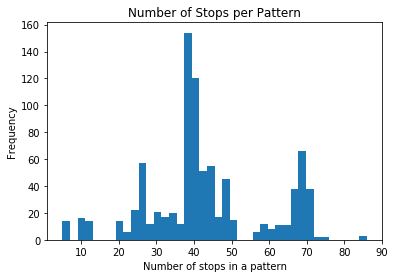

In [15]:
plt.hist(patterns.groupby(['id']).sequence.max(), bins=40)
plt.xlabel("Number of stops in a pattern")
plt.ylabel("Frequency")
plt.title("Number of Stops per Pattern")
plt.show()